In [1]:
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Detecting Multicollinearity Using Variance Inflation Factors

In [41]:
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=6.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [42]:
X= pd.read_csv('./X.csv')

In [43]:
X1= X.copy()

In [44]:
y= X.pop('Asset_Number')

In [45]:
X.columns

Index(['High_Level_Asset_Class[T.P&C]', 'High_Level_Asset_Class[T.S&T]',
       'High_Level_Asset_Class[T.Track]', 'weather_station[T.Leeds]',
       'weather_station[T.Manchester]', 'weather_station[T.Mirfield]',
       'weather_station[T.York]', 'event', 'T', 'Sum', 'temp_24h_d',
       'pressure_24h_d', 'humidity_24h_d', 'wind_speed_24h_d',
       'temp_24h_range', 'temp_1w_d', 'pressure_1w_d', 'humidity_1w_d',
       'wind_speed_1w_d', 'temp_1w_range'],
      dtype='object')

In [46]:
X1.isnull().sum()

High_Level_Asset_Class[T.P&C]      0
High_Level_Asset_Class[T.S&T]      0
High_Level_Asset_Class[T.Track]    0
weather_station[T.Leeds]           0
weather_station[T.Manchester]      0
weather_station[T.Mirfield]        0
weather_station[T.York]            0
Asset_Number                       0
event                              0
T                                  0
Sum                                0
temp_24h_d                         0
pressure_24h_d                     0
humidity_24h_d                     0
wind_speed_24h_d                   0
temp_24h_range                     0
temp_1w_d                          0
pressure_1w_d                      0
humidity_1w_d                      0
wind_speed_1w_d                    0
temp_1w_range                      0
dtype: int64

In [47]:
transformer = ReduceVIF()

In [48]:
X = transformer.fit_transform(X, y)

ReduceVIF fit
ReduceVIF transform
Dropping pressure_1w_d with vif=51980.725462906805
Dropping humidity_1w_d with vif=790.9309071140259
Dropping pressure_24h_d with vif=475.4988492637231
Dropping temp_1w_d with vif=147.00354751860954


C:\ProgramData\Anaconda3\envs\lifelines\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Dropping humidity_24h_d with vif=101.1686186104487
Dropping temp_1w_range with vif=74.70126708331003
Dropping wind_speed_1w_d with vif=45.79402299541221
Dropping temp_24h_d with vif=23.836198667695697
Dropping temp_24h_range with vif=14.866527289343116
Dropping wind_speed_24h_d with vif=11.382616768515994


In [55]:
def heatMap(df):#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(16, 16))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 8, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [56]:
X['Asset_Number']=X1['Asset_Number']

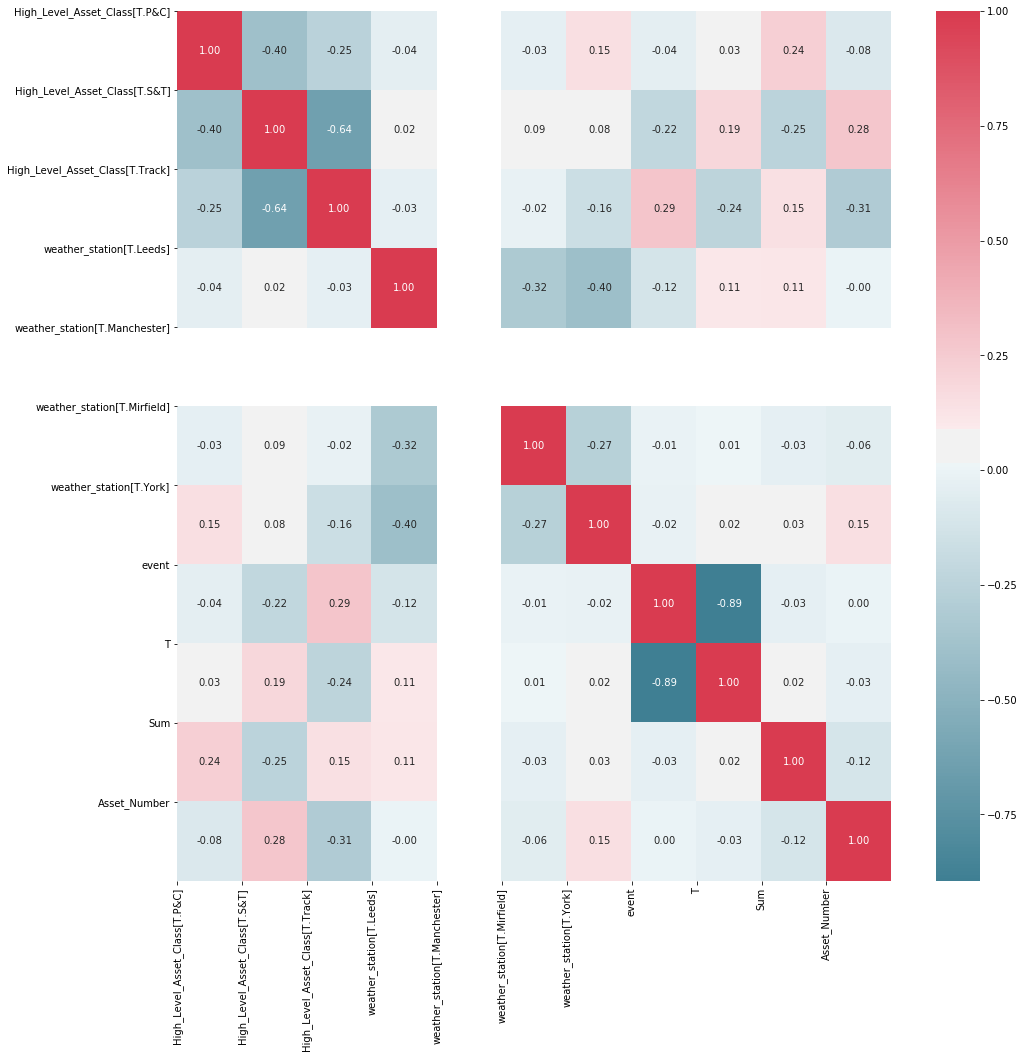

In [57]:
heatMap(X)

In [58]:
X.head()

,High_Level_Asset_Class[T.P&C],High_Level_Asset_Class[T.S&T],High_Level_Asset_Class[T.Track],weather_station[T.Leeds],weather_station[T.Manchester],weather_station[T.Mirfield],weather_station[T.York],event,T,Sum,Asset_Number
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,923.439884,113.0,1011867.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,833.960718,24.0,1063020.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,830.185719,19.0,10290424.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-55.286806,19.0,14105964.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-455.687685,19.0,14105964.0


In [53]:
X['weather_station[T.York]'].describe()

count    746.00000
mean       0.25067
std        0.43369
min        0.00000
25%        0.00000
50%        0.00000
75%        0.75000
max        1.00000
Name: weather_station[T.York], dtype: float64

In [54]:
X.to_csv('X_no.csv', index=False)